# Capstone - Covertype 


Forest Cover Type Dataset 
Tree types found in the Roosevelt National Forest in Colorado

https://www.kaggle.com/uciml/forest-cover-type-dataset

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')

In [213]:
# Loading the data again.


df = pd.read_csv('/Users/mille/Desktop/Supervised Learning/Copy of covtype.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)


# providing more information per column on data types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
column type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Questions: 

**How many variables do I have?**

Total of 55 variables. 
    Selected variables:
    1) Elevation - meters (continuous)
    2) Aspect in degrees azimuth (interval 0-360)
    3) Slope in degrees (interval 0-90) [OUTCOME VARIABLE]
    4) Horizontal_Distance_To_Hydrology distance to nearest surface water features (continuous)
    5) Horizontal_Distance_To_Roadways distance to nearest roadway. (continuous) 
    6) Cover_Type (categorical - ordinal: 1-7) 


**How many datapoints?**
11 MB csv file 
581k X 55 


**Variables**

Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
    1) Elevation - meters (continuous)
    2) Aspect - (continous: interval 0-360)
    3) Slope - (continous: interval 0-90) [OUTCOME VARIABLE]
    4) Horizontal_Distance_To_Hydrology - (continuous)
    5) Horizontal_Distance_To_Roadways - (continuous) 
    6) Cover_Type - (categorical - ordinal: 1-7) 

**Histograms and distributions**

Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
    1) Elevation  - Normal distribution 
    2) Aspect - binomial 
    3) Slope - skewed left gamma
    4) Horizontal_Distance_To_Hydrology - gamma
    5) Horizontal_Distance_To_Roadways - gamma
    6) Cover_Type - poisson 

Do I have missing data? If so, how much?
None

**Variance within each variable**

How much variance is there in each of my variables? 
    1) Elevation - 78391.31649113903 HIGH VARIANCE
    2) Aspect - 12524.659392137874 HIGH VARIANCE
    3) Slope - 56.07366896224123 LOW VARIANCE
    4) Horizontal_Distance_To_Hydrology - 45177.15080780635 HIGH VARIANCE
    5) Horizontal_Distance_To_Roadways - 2431271.564746081 HIGH VARIANCE
    6) Cover_Type - 1.9502209482198223 LOW VARIANCE 
 

**Cover_Type**

1.Spruce/Fir
2.Lodgepole Pine
3.Ponderosa Pine
4.Cottonwood/Willow
5.Aspen
6.Douglas-fir
7.Krummholz

In [214]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Exploratory data analysis 

## I. Histograms & Distributions 

## II. Plots and Boxplots 

### Models
    
    1. KNN
    2. Random Forest, Decision Trees, Boost Trees
    3. Linear Classifiers: Logistic Regression, Naive Bayes Classifier
    4. Support Vector Machines



### Goals
    1. Predicting cover type (most common with this dataset). 
    2. Using machine learning alogrithims to define Wilderness Areas based on avialable features
    3. Probabilites with Bayesian models to predict soil types of the cover types. 
    4. Predicting Fire points based on features
    5. Elevation, Slope, Aspect influence the soil types?
    6. Why is certain cover type more predominate over others in this region of Colorado? (Bring in cited literature)
    7. How can machine learning classification models help led to management decision of the roosevelt forest in colorado?
    

## Previous Scientific publication on the dataset
https://pdfs.semanticscholar.org/42fd/f2999c46babe535974e14375fbb224445757.pdf



**The dataset is baised towards two Wilderness Areas:**

Rawah Wilderness Area (73,213 acres) 0.450792224 - Contains 25 named lakes, Elevation 8,000 - 13,000 

Comanche Peak Wilderness Area (67,680 acres) 0.428427643 - Ranges from 8,000 - to over 12,000 feet

Neota Wilderness Area (9647 acres)	0.061067398 - Elevation ranges from 10,000 ft (3,000 m) to 11,896 ft (3,626 m) 
Subalpine - Krummholz habitats (mostly) - lower elevations contain lodgepole 

Cache la Poudre Wilderness Area (9433 acres) 0.059712736 - 6,200 feet (1,900 m) to 8,600 feet (2,600 m) It follows the Cashe la Pourde River likely Douglas Fir and Cottonwoods 


## Map of Colorado Wilderness Areas 

**The northern Colorado west of Fort Collins is the Study Area**
![Alt text](http://www.coloradoswildareas.com/wp-content/uploads/2010/08/Colorado_Wilderness_Map.jpg)


### Forest Type (Images) 
**Spruce - Fir forest**
![Alt text](https://csfs.colostate.edu/media/sites/22/2014/02/spruce-fir-edge.jpg)


**Lodgepole pine forest**
![Alt text](https://mountviewtree.com/wp-content/uploads/2013/07/lodgepole-pine.jpg)


**Ponderosa Pine forest**
![Alt text](https://www.researchgate.net/profile/Robert_Addington/publication/322917335/figure/fig13/AS:589964072980494@1517669804543/Ponderosa-pine-woodland-in-the-Roosevelt-National-Forest-near-Red-Feather-Lakes.png)


**Cottonwood and Willows**
![Alt text](https://www.publicdomainpictures.net/pictures/130000/velka/huge-cottonwood-tree.jpg)


**Aspen trees**
![Alt text](https://assets.simpleviewinc.com/simpleview/image/upload/c_fill,h_645,q_50,w_1600/v1/clients/denver/012_3_0233_jpeg_ead6b1ea-14f6-4b75-bc62-e1b8d57fa3fc.jpg)


**Douglas Fir**
![Alt text](https://csfs.colostate.edu/media/sites/22/2014/02/Douglas-fir-treerevised.jpg)


**Krummholz - stunted windblown trees growing near the tree line on mountains.**
![Alt text](https://www.swcoloradowildflowers.com/Tree%20Enlarged%20Photos/6pien.jpg)



# EDA 

In [215]:
print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

### Skewness in the dataset - Soil_Type15 is considerably high compared to the other features. 

**Soil_Type15: unspecified in the USFS Soil and ELU Survey** 

**Soil_Type15 looks as though it is the garbage bin for unknown soil types. Soil_Type15 should be dropped from the dataset. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

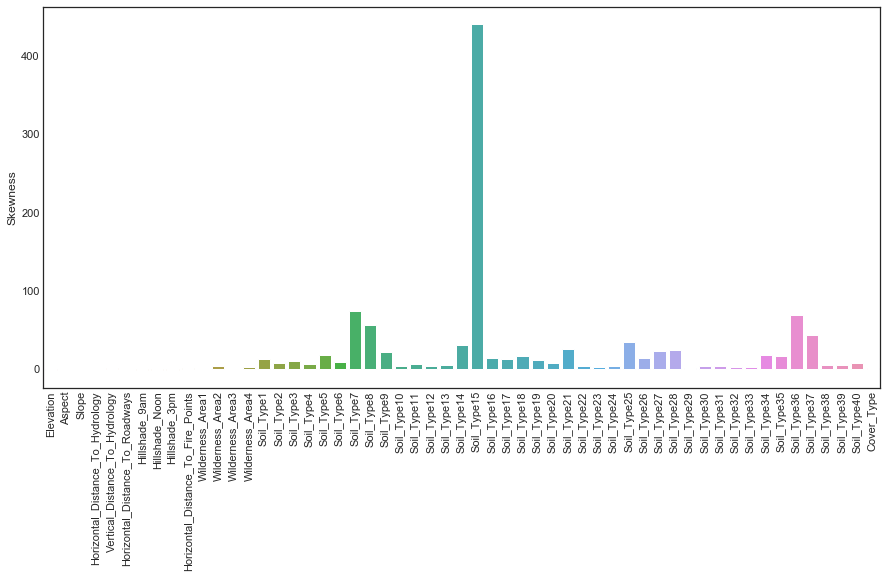

In [223]:
skew=df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

In [285]:
#Just continious features 
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

#All binary features
binary_data=df.loc[:,'Wilderness_Area1':'Soil_Type40']

#Wilderness area binary 
Wilderness_data=df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

#Soil type binary 
Soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']

In [286]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

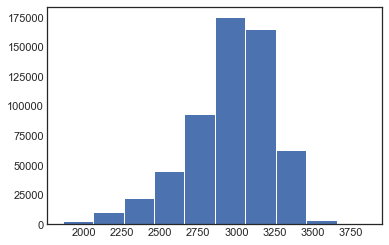

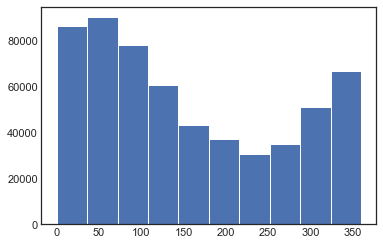

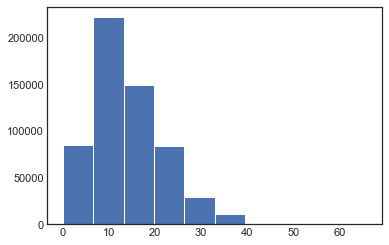

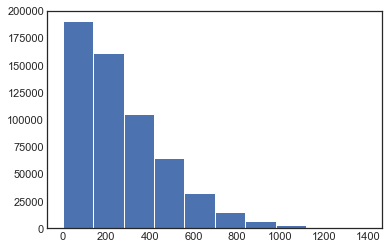

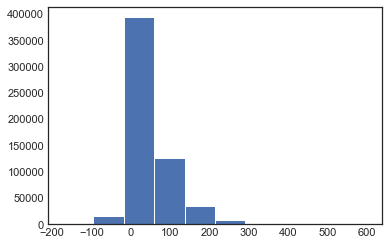

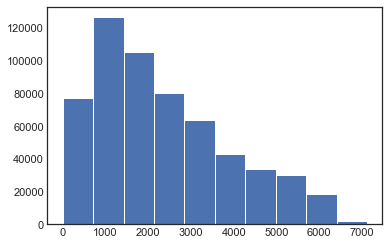

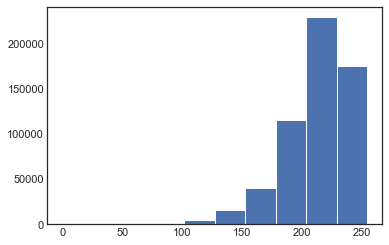

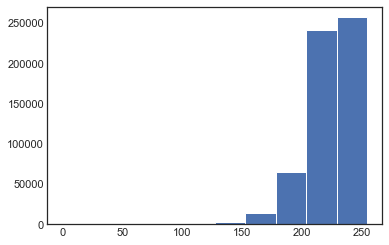

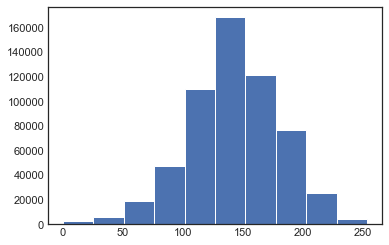

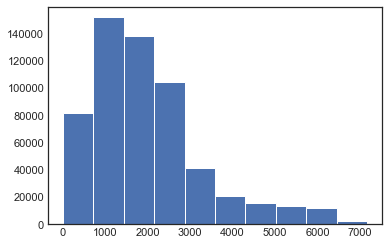

In [287]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    plt.hist(cont_data[col])

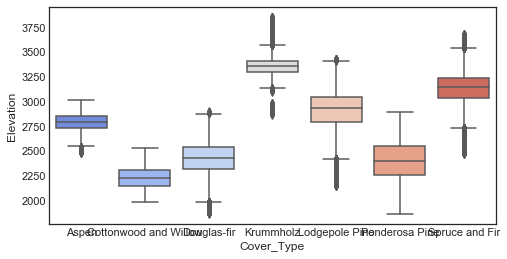

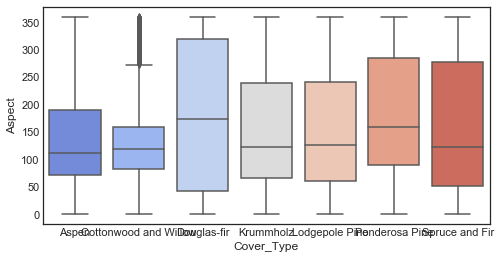

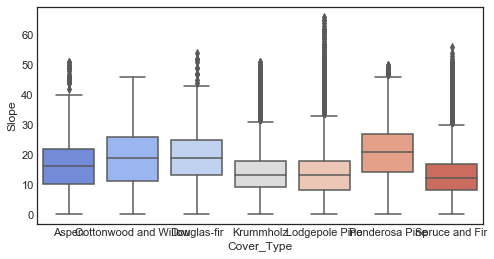

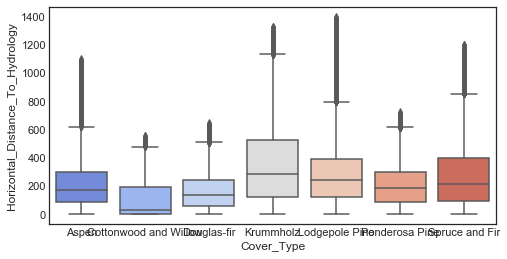

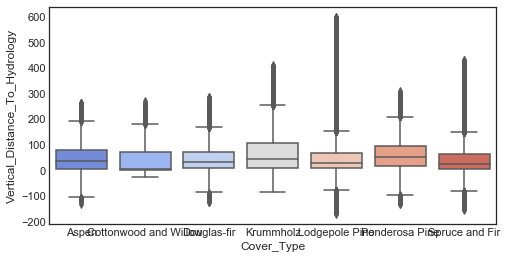

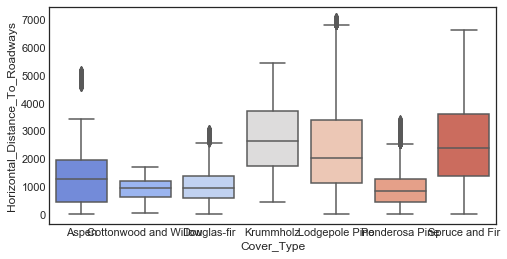

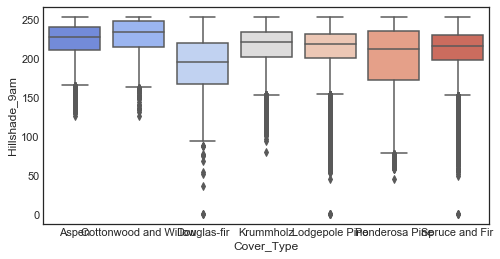

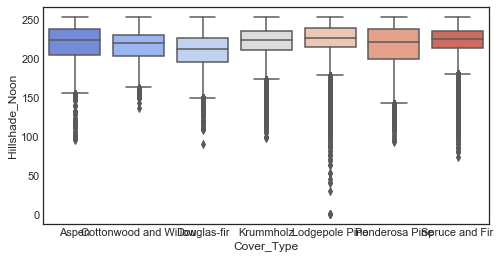

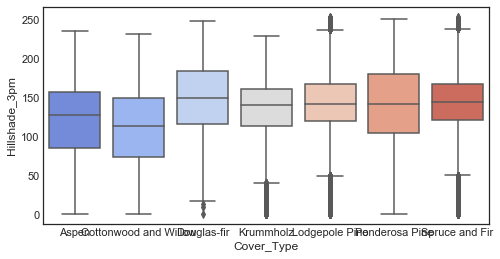

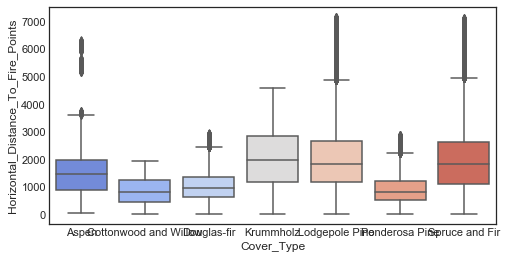

In [288]:
df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")

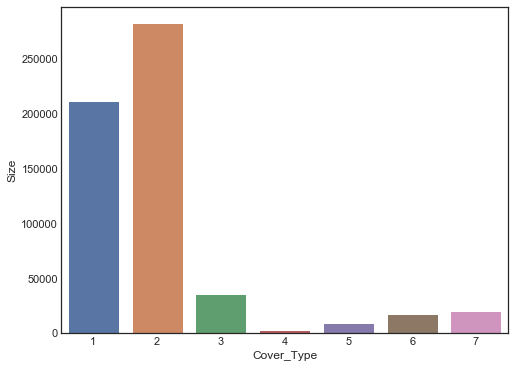

In [224]:
cov=df.groupby('Cover_Type').size()
cov=pd.DataFrame(cov,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=cov.index,y='Size',data=cov)

#### Most dominant cover type is 2 = Lodgepole pine. 

Lodgepole pine makes up a vast majority of the Northern Colorado Forest, since it can tolerate very cold weather and wide range of elevations. 


### The cover types are not distributed evenly across all the Wilderness Areas.

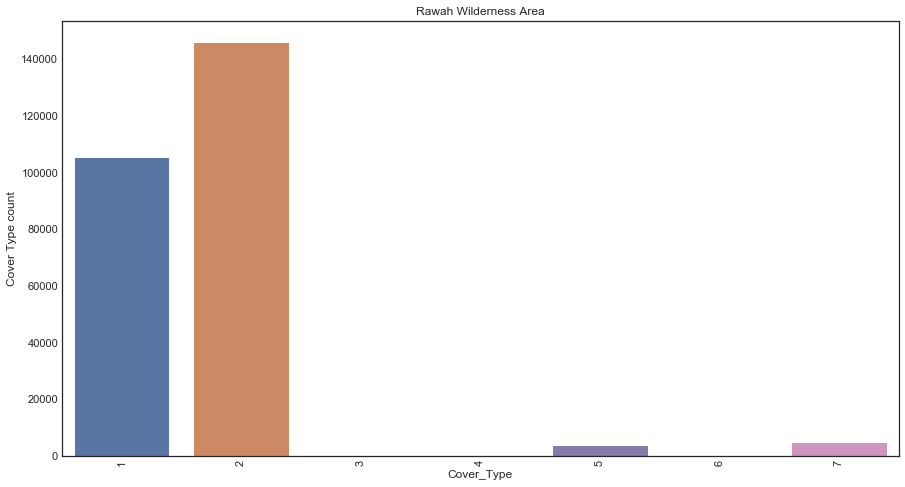

In [227]:
state_col = df[['Cover_Type','Wilderness_Area1']].groupby(['Cover_Type']).sum()
state_col = state_col['Wilderness_Area1'].sort_values(ascending=False)[:58]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Rawah Wilderness Area')
plt.ylabel('Cover Type count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

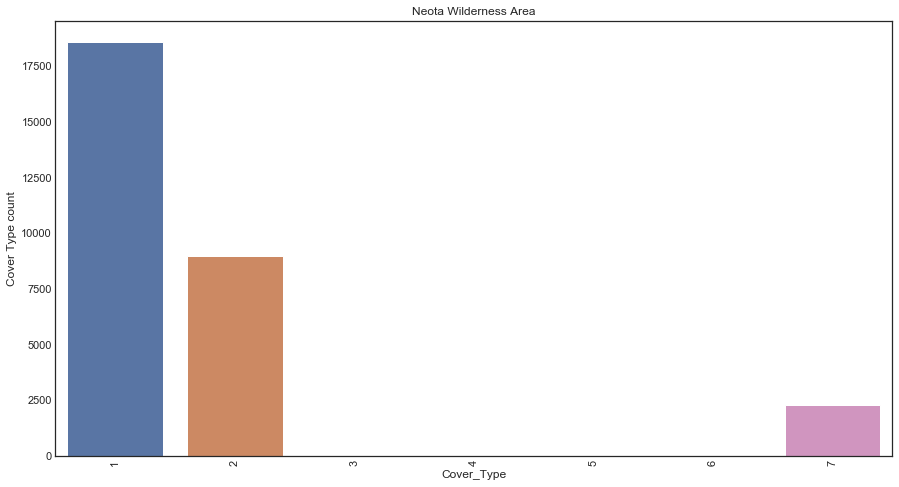

In [228]:
state_col = df[['Cover_Type','Wilderness_Area2']].groupby(['Cover_Type']).sum()
state_col = state_col['Wilderness_Area2'].sort_values(ascending=False)[:58]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Neota Wilderness Area')
plt.ylabel('Cover Type count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

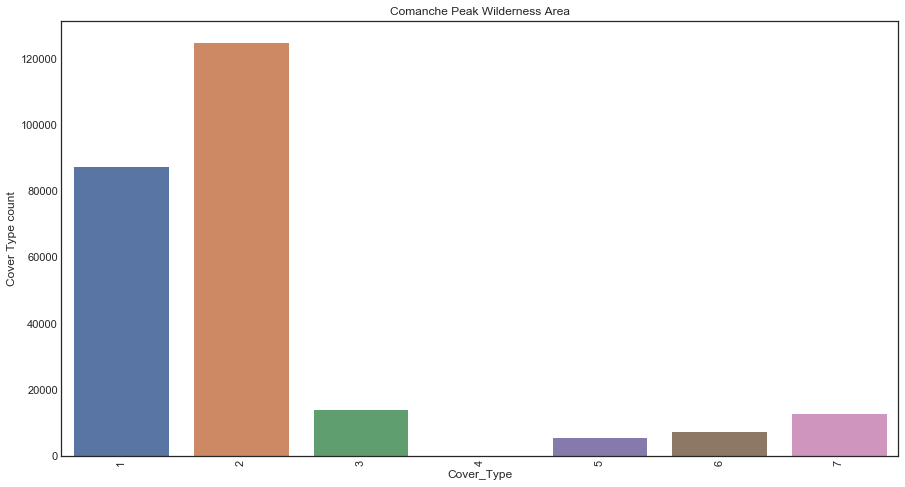

In [229]:
state_col = df[['Cover_Type','Wilderness_Area3']].groupby(['Cover_Type']).sum()
state_col = state_col['Wilderness_Area3'].sort_values(ascending=False)[:58]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Comanche Peak Wilderness Area')
plt.ylabel('Cover Type count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

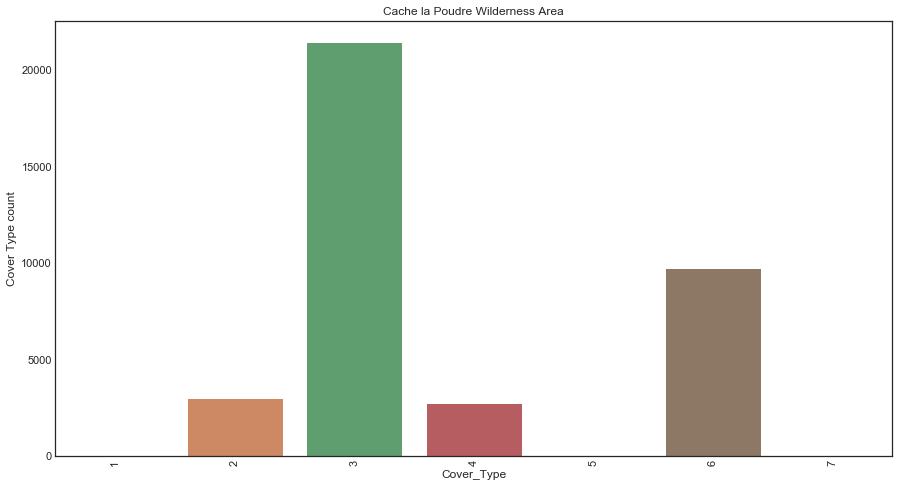

In [230]:
state_col = df[['Cover_Type','Wilderness_Area4']].groupby(['Cover_Type']).sum()
state_col = state_col['Wilderness_Area4'].sort_values(ascending=False)[:58]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Cache la Poudre Wilderness Area')
plt.ylabel('Cover Type count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

**Lower elevation along the La Pourder River, thus the high occurence of Ponderosa Pine**

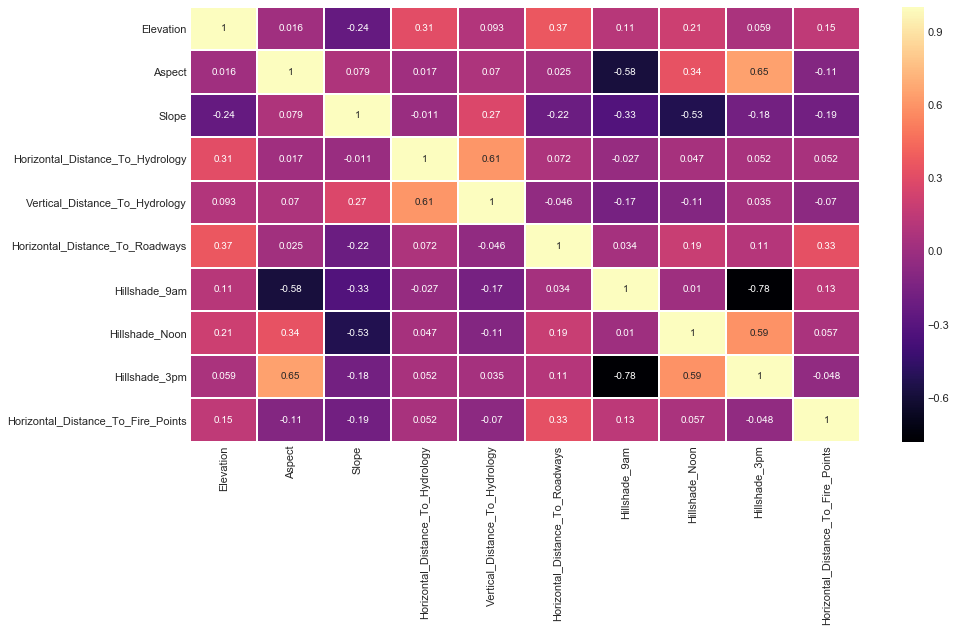

In [289]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

### Four Wilderness Areas 

Create four new features of Wilderness Area by sum of soil types. 

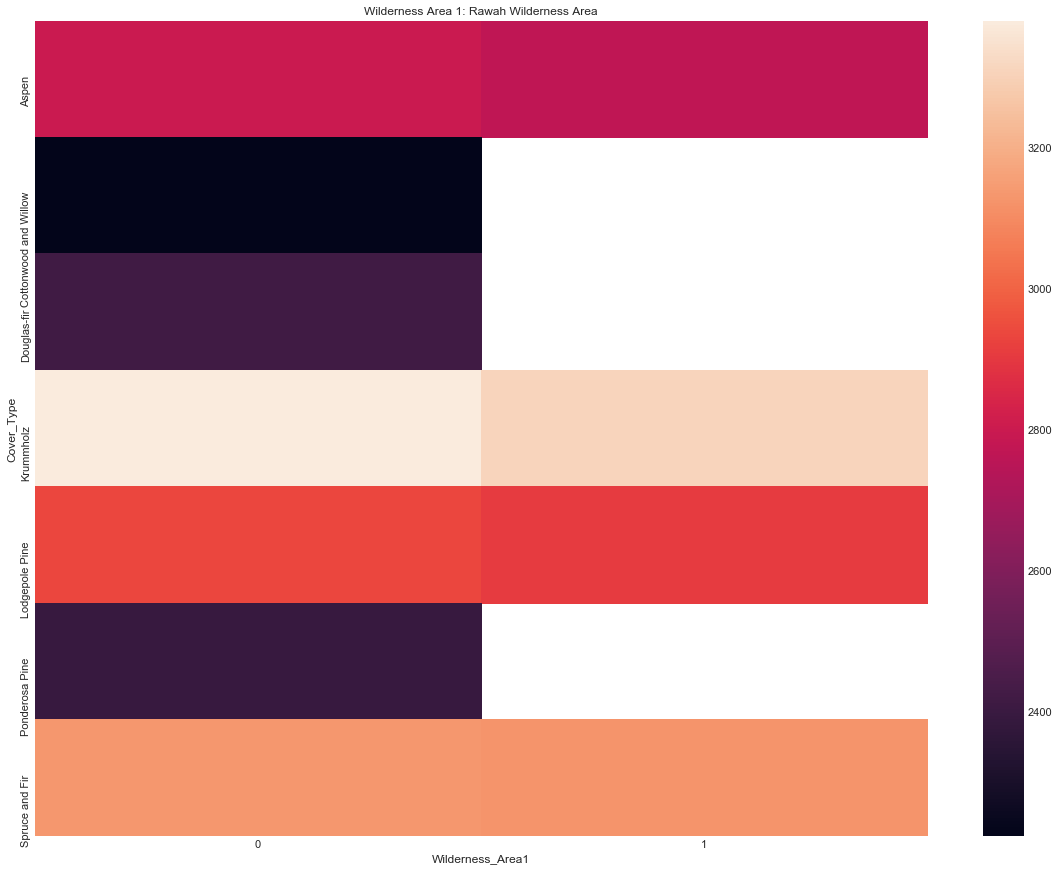

In [238]:
plt.subplots(figsize=(20,15))
plt.title('Wilderness Area 1: Rawah Wilderness Area')
trees = df.pivot_table(values='Elevation',index='Cover_Type',columns='Wilderness_Area1')
sns.heatmap(trees)

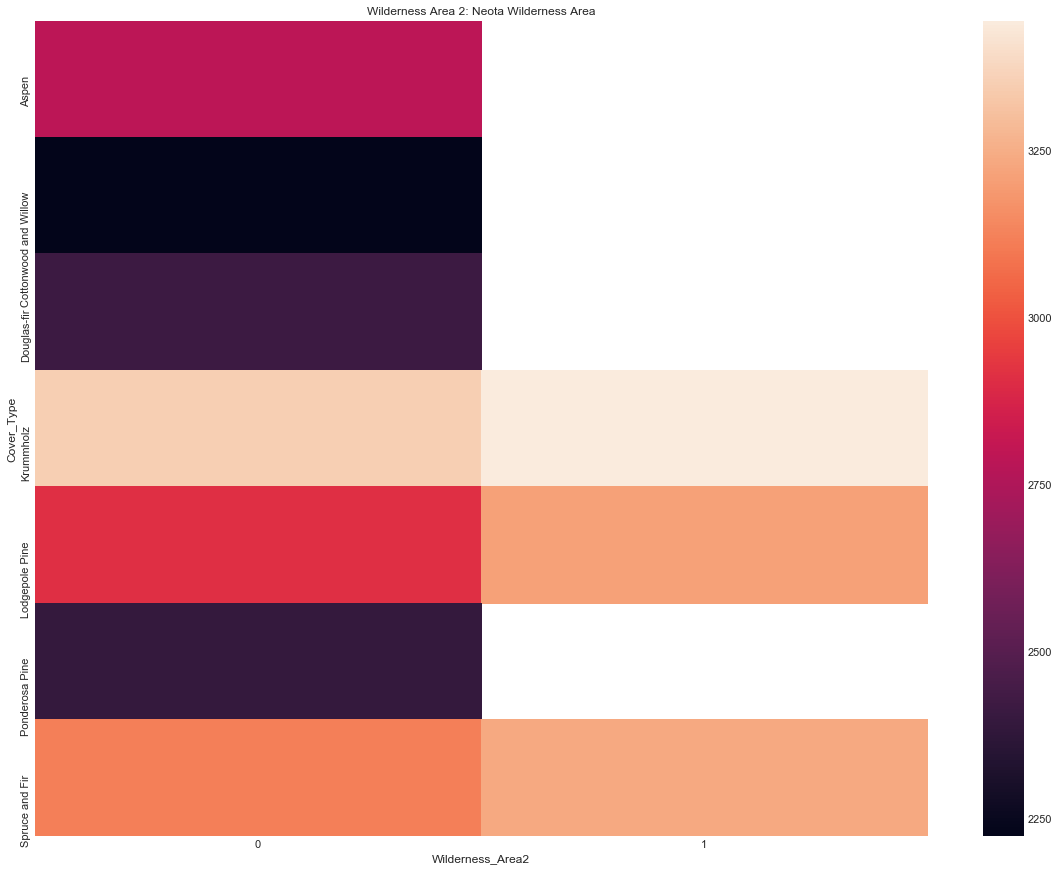

In [239]:
plt.subplots(figsize=(20,15))
plt.title('Wilderness Area 2: Neota Wilderness Area')
trees = df.pivot_table(values='Elevation',index='Cover_Type',columns='Wilderness_Area2')
sns.heatmap(trees)

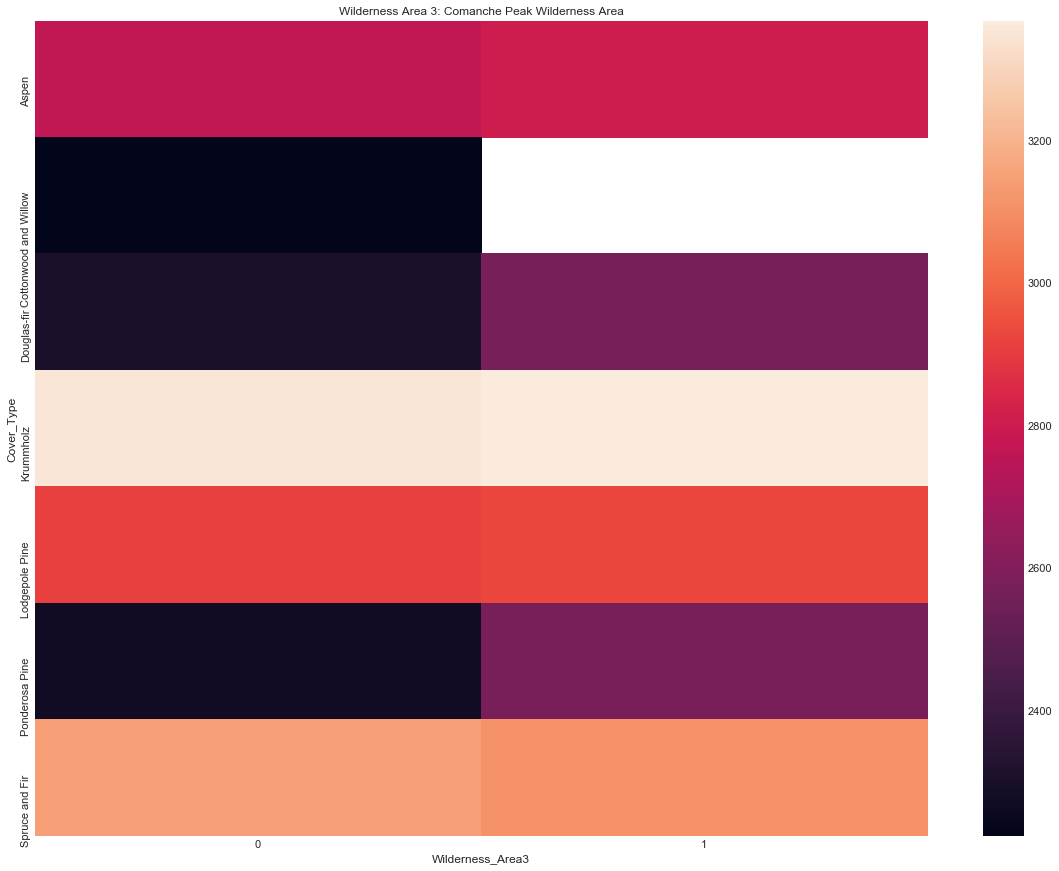

In [240]:
plt.subplots(figsize=(20,15))
plt.title('Wilderness Area 3: Comanche Peak Wilderness Area')
trees = df.pivot_table(values='Elevation',index='Cover_Type',columns='Wilderness_Area3')
sns.heatmap(trees)

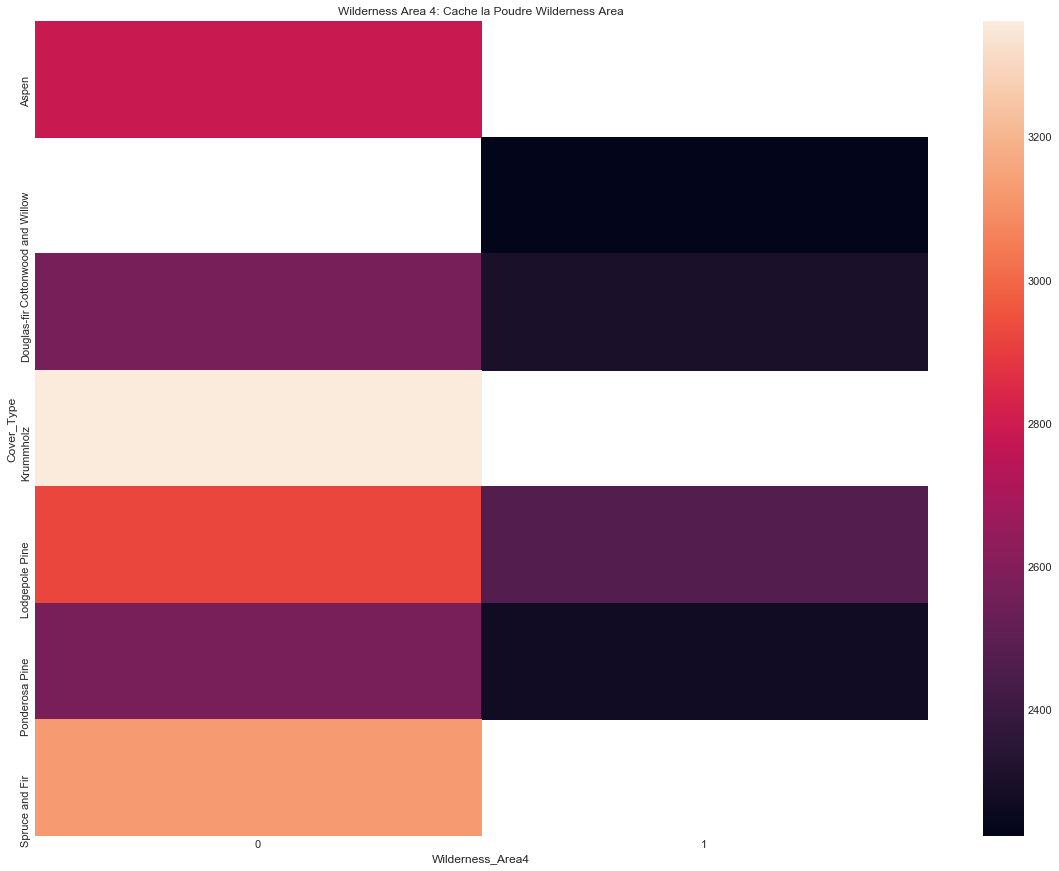

In [241]:
plt.subplots(figsize=(20,15))
plt.title('Wilderness Area 4: Cache la Poudre Wilderness Area')
trees = df.pivot_table(values='Elevation',index='Cover_Type',columns='Wilderness_Area4')
sns.heatmap(trees)

# Linear Regression Least Squares 

### Only the continuous variables 

Setting up Non-linear least squares fitting to an ellipse 
https://scipython.com/book/chapter-8-scipy/examples/non-linear-fitting-to-an-ellipse/

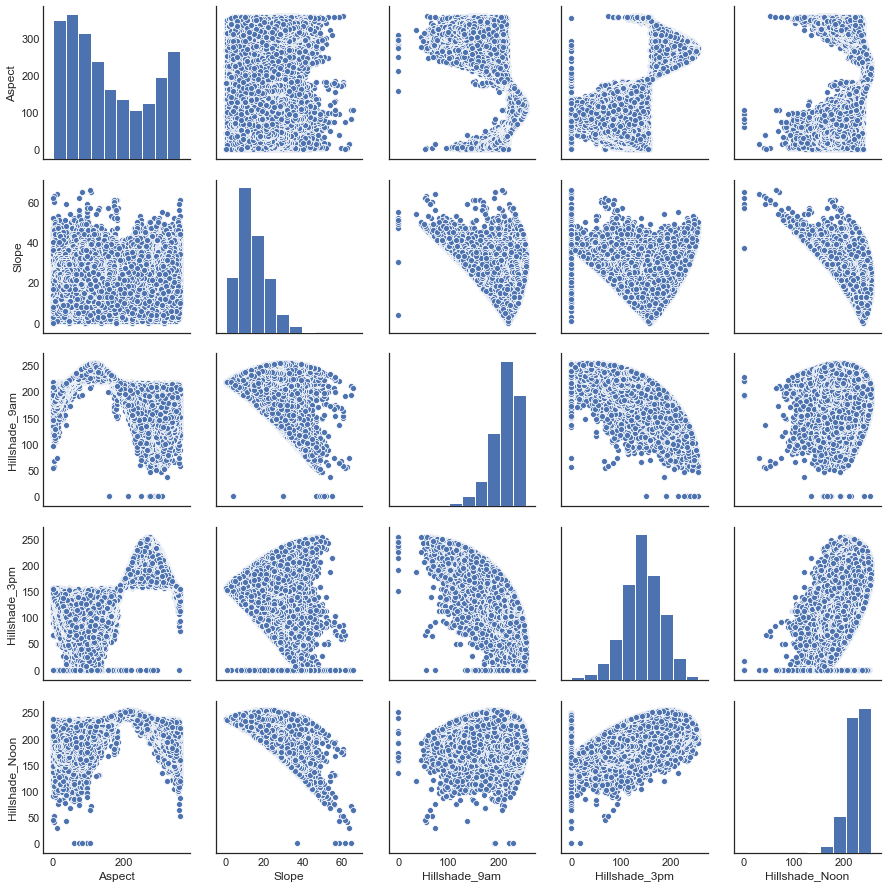

In [242]:
# Variables associated with light and potential plant growth 

sns.pairplot(df[['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon']])

In [243]:
est = smf.ols('Aspect ~ Slope + Hillshade_9am + Hillshade_Noon + Hillshade_3pm', df).fit()
est.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Aspect   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.240e+05
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:54:35   Log-Likelihood:            -3.3862e+06
No. Observations:              581012   AIC:                         6.772e+06
Df Residuals:                  581007   BIC:                         6.772e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -39.0472      6.932     -5.633      0.000     -52.634     -25.461
Slope              2.3922      0.037     64.103      0.000       2.319       2.465
Hillshade_9am     -1.3470      0.041    -32.569      0.000      -1.428      -1.266
Hillshade_Noon     1.5044      0.034     44.505      0.000       1.438       1.571
Hillshade_3pm      0.7771      0.034     22.871      0.000       0.710       0.844
==============================================================================
Omnibus:                     7968.317   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7870.208
Skew:                           0.263   Prob(JB):                         0.00
Kurtosis:                       2.779   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Dropping Hillshade 9am and Hillshade noon got rid of the strong multicollinearity but also slightly reduced R-squared value.

In [244]:
est = smf.ols('Aspect ~ Slope + Hillshade_3pm', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Aspect   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 2.443e+05
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:54:37   Log-Likelihood:            -3.3882e+06
No. Observations:              581012   AIC:                         6.776e+06
Df Residuals:                  581009   BIC:                         6.776e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -170.3837      0.502   -339.445      0.000    -171.368    -169.400
Slope             2.9687      0.015    202.229      0.000       2.940       2.997
Hillshade_3pm     1.9938      0.003    694.200      0.000       1.988       1.999
==============================================================================
Omnibus:                     4709.441   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4118.785
Skew:                           0.156   Prob(JB):                         0.00
Kurtosis:                       2.729   Cond. No.                         687.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

In [246]:
y = df['Aspect']
X = df[['Slope', 'Hillshade_3pm']]

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [249]:
from sklearn.linear_model import LinearRegression

In [250]:
lm = LinearRegression()

In [251]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [252]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [2.98072303 1.99437854]


In [253]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

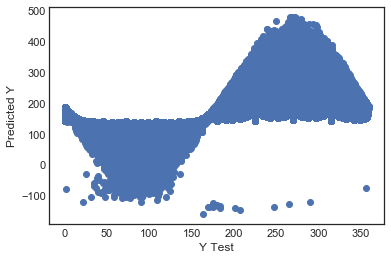

In [254]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Non-linear relationship with Aspect as the y-variable. Polynomial relationship. 

In [255]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 64.41518645336427
MSE: 6838.00752085168
RMSE: 82.69224583267575


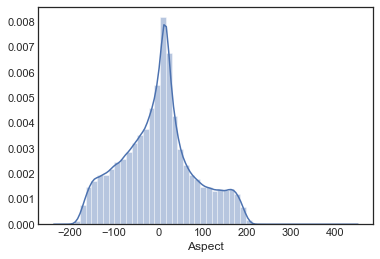

In [256]:
sns.distplot((y_test-predictions),bins=50)

In [257]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Slope,2.980723
Hillshade_3pm,1.994379


# Navie Bayes - Comparing cross validation scores 

#### Wilderness_Area1 

In [261]:
data = df.ix[:, 'Soil_Type1':'Soil_Type40']
target = df['Wilderness_Area1']

In [262]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [264]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8793490701616998
Testing on Sample: 0.8810351593426642


In [265]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.94084541, 0.93876287, 0.95834911, 0.95705828, 0.8847544 ,
       0.91736945, 0.85299484, 0.80982788, 0.73111876, 0.65908778])

In [266]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')>

#### Wilderness_Area2

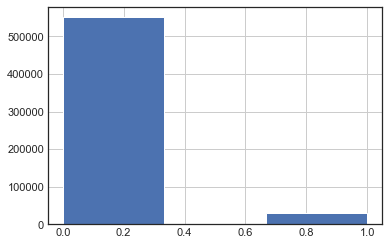

In [267]:
df['Wilderness_Area2'].hist(bins=3)

In [268]:
data = df.ix[:, 'Soil_Type1':'Soil_Type40']
target = df['Wilderness_Area2']

In [269]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [270]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.9485985731865787
Testing on Sample: 0.9493814241358182


In [271]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.91738666, 0.94855599, 0.94855599, 0.94855599, 0.94857231,
       0.94857231, 0.94857231, 0.94857231, 0.95475043, 0.95053356])

# KNN

In [291]:
X = df.ix[:, 'Elevation':'Soil_Type40'].drop(columns=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37'])
y = df['Cover_Type']

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)


In [294]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [295]:
knn = KNeighborsClassifier(n_neighbors=5) #Using Eucledian distance


In [296]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [297]:
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)

KNN Accuracy: 0.965135625114742


*** The KNN model shows the 96.51% accuracy at assigning the Cover_Type. It is most likely assigning Cover Type to Spruce and Fir or Lodgepole pine which make up 85% of the Cover Type data. ***

In [300]:
class_dist=df.groupby('Cover_Type').size()


In [301]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type Aspen
1.63 %
Cover_Type Cottonwood and Willow
0.47 %
Cover_Type Douglas-fir
2.99 %
Cover_Type Krummholz
3.53 %
Cover_Type Lodgepole Pine
48.76 %
Cover_Type Ponderosa Pine
6.15 %
Cover_Type Spruce and Fir
36.46 %


# Questions 

1. How do you predict an individual Cover_Type
2. How do you account for an uneven distribution of Cover_Type during the model?
3. Plotting Aspect data into a ellipse 

# Random Forest 

In [311]:
pd.get_dummies(df)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Cover_Type_Cottonwood and Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce and Fir,Wilderness_Type_Wilderness_Area1,Wilderness_Type_Wilderness_Area2,Wilderness_Type_Wilderness_Area3,Wilderness_Type_Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,1,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,1,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,1,0,0,1,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,1,0,0,1,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,1,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,1,0,0,1,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,1,0,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,1,0,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,1,0,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,1,0,0,0


In [312]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df.ix[:, 'Elevation':'Soil_Type40'].drop(columns=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37'])
Y = df['Cover_Type']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.6811235 , 0.58489235, 0.71013545, 0.6544353 , 0.49918246,
       0.62656409, 0.62227845, 0.57016472, 0.5715761 , 0.66655192])

#### Random Forest did a poor job at predicting. 

# Logistic Regression 